In [13]:
import pandas as pd

df = pd.read_csv('../data/cleaned_COT_data.csv',index_col=0)
for i in df.columns:
    df[i] = pd.to_numeric(df[i].values.reshape(-1),errors='coerce') 
df

,H-110 COT,H-120 COT,H-130 COT,H-140 COT,H-150 COT,H-160 COT,H-170 COT,H-180 COT,H-190 COT
日期,,,,,,,,,
2020-01-01 00:00:00,824.37,824.76,824.67,237.69,825.08,830.80,814.64,824.68,825.01
2020-01-01 00:10:00,825.28,825.38,825.61,252.83,825.51,834.09,815.16,825.39,825.42
2020-01-01 00:20:00,824.67,824.87,824.47,265.87,824.03,840.08,814.72,824.52,824.96
2020-01-01 00:30:00,823.62,824.49,824.76,275.72,823.62,845.13,814.67,824.05,824.67
2020-01-01 00:40:00,825.00,824.92,825.07,285.64,825.80,845.21,815.50,825.41,825.17
...,...,...,...,...,...,...,...,...,...
2020-12-31 23:20:00,818.15,817.72,817.37,818.09,817.59,816.89,817.96,817.18,478.11
2020-12-31 23:30:00,817.00,817.63,816.80,817.88,817.20,818.47,817.68,817.58,469.84
2020-12-31 23:40:00,817.50,817.39,817.53,818.45,817.37,817.88,817.68,817.61,463.99


In [14]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 9 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
H-130 COT,5,0.0
H-150 COT,5,0.0
H-140 COT,4,0.0
H-160 COT,4,0.0
H-190 COT,4,0.0
H-110 COT,3,0.0
H-120 COT,3,0.0
H-170 COT,3,0.0
H-180 COT,3,0.0


In [15]:
df.corr().abs().style.background_gradient()

,H-110 COT,H-120 COT,H-130 COT,H-140 COT,H-150 COT,H-160 COT,H-170 COT,H-180 COT,H-190 COT
H-110 COT,1.000000,0.031210,0.482561,0.051541,0.042072,0.038867,0.022861,0.066728,0.030684
H-120 COT,0.031210,1.000000,0.248552,0.089967,0.081427,0.053478,0.033322,0.013678,0.387124
H-130 COT,0.482561,0.248552,1.000000,0.097207,0.059238,0.063895,0.117846,0.171583,0.061330
H-140 COT,0.051541,0.089967,0.097207,1.000000,0.073232,0.316236,0.052391,0.143489,0.077746
H-150 COT,0.042072,0.081427,0.059238,0.073232,1.000000,0.071368,0.040503,0.073620,0.069435
H-160 COT,0.038867,0.053478,0.063895,0.316236,0.071368,1.000000,0.035371,0.097489,0.051764
H-170 COT,0.022861,0.033322,0.117846,0.052391,0.040503,0.035371,1.000000,0.070108,0.029083
H-180 COT,0.066728,0.013678,0.171583,0.143489,0.073620,0.097489,0.070108,1.000000,0.074106
H-190 COT,0.030684,0.387124,0.061330,0.077746,0.069435,0.051764,0.029083,0.074106,1.000000


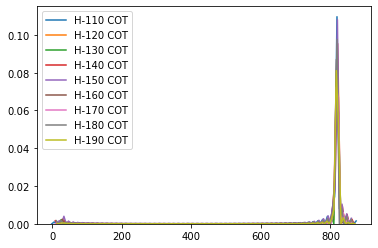

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns:
    sns.kdeplot(df[i],label=i)
plt.show()